In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('Traffic_Crashes_Resulting_in_Injury_Cleaned.csv')
data

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique_Id,Cnn_Intrsctn_Fkey,Cnn_Sgmt_Fkey,Case_Id_Pkey,Tb_Latitude,Tb_Longitude,Geocode_Source,Geocode_Location,Collision_Datetime,Collision_Date,...,Party2_Move_Pre_Acc,Point,Data_As_Of,Data_Updated_At,Data_Loaded_At,Neighborhoods,Sf Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,439,20410000,13331000.0,130384415,37.713257,-122.414407,Sfpd-Crossroads,City Street,05/10/2013 02:53:00 Pm,2013 May 10,...,Stopped In Road,Point (-122.414406 37.713257),05/10/2013 12:00:00 Am,04/26/2023 12:00:00 Am,09/30/2023 03:30:25 Am,75.0,75.0,9.0,9.0,40.0
1,54003,20364000,2445000.0,200639029,37.714311,-122.408277,Sfpd-Interim Db,City Street,10/22/2020 08:15:00 Pm,2020 October 22,...,Proceeding Straight,Point (-122.40828 37.71431),10/27/2020 12:00:00 Am,04/26/2023 12:00:00 Am,09/30/2023 03:30:28 Am,75.0,75.0,9.0,9.0,40.0
2,57019,30079000,13154102.0,210833590,37.787227,-122.421798,Sfpd-Interim Db,City Street,12/17/2021 09:49:00 Am,2021 December 17,...,Parked,Point (-122.4218 37.787228),01/20/2022 12:00:00 Am,04/26/2023 12:00:00 Am,09/30/2023 03:30:40 Am,100.0,100.0,4.0,6.0,39.0
3,30729,26629000,3453000.0,6096662,37.786863,-122.434697,Sfpd-Crossroads,City Street,09/27/2012 10:22:00 Am,2012 September 27,...,Stopped In Road,Point (-122.4347 37.78686),09/27/2012 12:00:00 Am,04/26/2023 12:00:00 Am,09/30/2023 03:30:43 Am,103.0,103.0,4.0,11.0,30.0
4,5080,21964000,3028101.0,3997255,37.733801,-122.435670,Sfpd-Crossroads,City Street,11/21/2008 08:40:00 Am,2008 November 21,...,Stopped In Road,Point (-122.43567 37.733803),11/21/2008 12:00:00 Am,04/26/2023 12:00:00 Am,09/30/2023 03:30:44 Am,96.0,96.0,9.0,5.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16391,25812,24655000,6108000.0,6058802,37.787746,-122.405197,Sfpd-Crossroads,City Street,03/01/2012 09:36:00 Am,2012 March 01,...,Proceeding Straight,Point (-122.4052 37.787746),03/01/2012 12:00:00 Am,04/26/2023 12:00:00 Am,09/30/2023 03:32:59 Am,19.0,19.0,6.0,3.0,8.0
16392,43785,27486000,6071101.0,3538811,37.780568,-122.473965,Sfpd-Crossroads,City Street,12/05/2007 04:32:00 Pm,2007 December 05,...,Not Stated,Point (-122.47397 37.780567),12/05/2007 12:00:00 Am,04/26/2023 12:00:00 Am,09/30/2023 03:33:04 Am,5.0,5.0,8.0,4.0,29.0
16393,48020,21647000,5087000.0,190541536,37.724707,-122.429379,Sfpd-Interim Db,City Street,07/25/2019 10:34:00 Pm,2019 July 25,...,Backing,Point (-122.42938 37.72471),08/09/2019 12:00:00 Am,04/26/2023 12:00:00 Am,09/30/2023 03:33:05 Am,90.0,90.0,9.0,1.0,7.0
16394,35717,26705000,2785001.0,6049383,37.804143,-122.425134,Sfpd-Crossroads,City Street,10/15/2012 06:00:00 Pm,2012 October 15,...,Proceeding Straight,Point (-122.42513 37.804142),10/15/2012 12:00:00 Am,04/26/2023 12:00:00 Am,09/30/2023 03:32:59 Am,17.0,17.0,4.0,6.0,13.0


In [3]:
#Research question 1
#What are the most common weather conditions associated with traffic crashes resulting in injury?
injury_data = data[data['Collision_Severity'].str.contains('Injury')]
weather_counts = injury_data['Weather_1'].value_counts()

In [4]:
print("Weather Conditions Associated with Traffic Crashes Resulting in Injury:")
print(weather_counts.head(10))

Weather Conditions Associated with Traffic Crashes Resulting in Injury:
Clear                  13430
Cloudy                  1747
Raining                  848
Not Stated                87
Fog                       65
Other                     32
Wind                      13
Other: Not On Scene        1
Snowing                    1
Name: Weather_1, dtype: int64


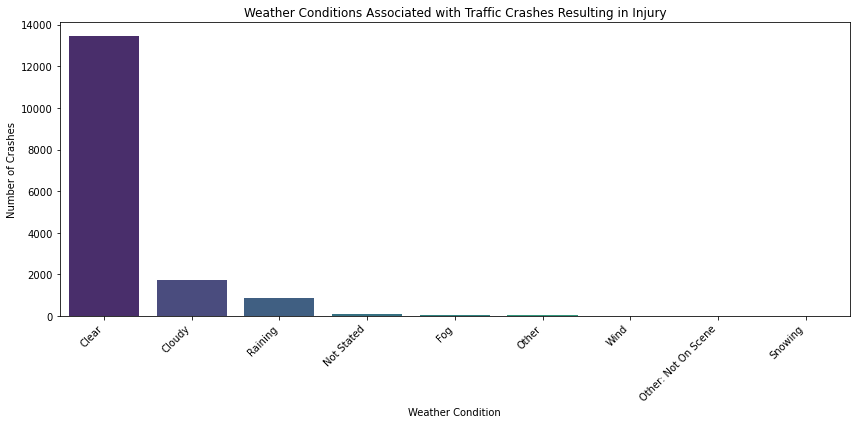

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_counts.head(10).index, y=weather_counts.head(10).values, palette="viridis")
plt.title("Weather Conditions Associated with Traffic Crashes Resulting in Injury")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
#Research question 2
#Are there specific days of the week or times of the day when theseaccidents are more likely to occur?
data['Collision_Datetime'] = pd.to_datetime(data['Collision_Datetime'])

In [8]:
data['day_of_week'] = data['Collision_Datetime'].dt.day_name()
data['hour_of_day'] = data['Collision_Datetime'].dt.hour

In [9]:
day_of_week_counts = data['day_of_week'].value_counts()

In [10]:
print("Accidents Distribution Across Days of the Week:")
print(data['day_of_week'].value_counts())

Accidents Distribution Across Days of the Week:
Wednesday    2602
Friday       2553
Tuesday      2543
Thursday     2427
Monday       2301
Saturday     2118
Sunday       1852
Name: day_of_week, dtype: int64


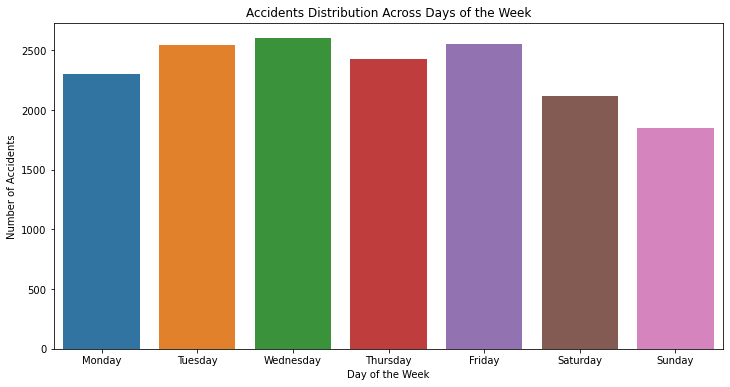

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents Distribution Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

In [12]:
print("\nAccidents Distribution Across Times of the Day:")
print(data['hour_of_day'].value_counts())


Accidents Distribution Across Times of the Day:
17    1353
18    1242
15    1196
16    1177
14    1064
8     1012
13     925
12     908
9      886
19     867
11     838
10     731
20     649
21     605
7      605
22     510
23     447
0      291
2      250
6      247
1      247
5      137
3      121
4       88
Name: hour_of_day, dtype: int64


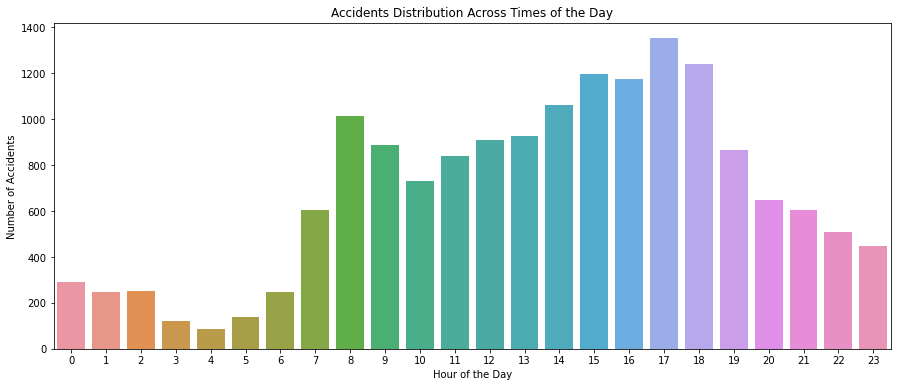

In [13]:
hour_of_day_counts = data['hour_of_day'].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=hour_of_day_counts.index, y=hour_of_day_counts.values)
plt.title('Accidents Distribution Across Times of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

In [14]:
#Research question 3
#Do certain intersections or road types have a higher frequency of injury related accidents?
injury_data = data[data['Collision_Severity'].str.contains('Injury')]

In [15]:
intersection_counts = injury_data['Intersection'].value_counts().head(10)

In [16]:
print("Top 10 Intersections with the Highest Frequency of Injury-Related Accidents:")
print(injury_data['Intersection'].value_counts().head(10))

Top 10 Intersections with the Highest Frequency of Injury-Related Accidents:
Midblock > 20Ft                   9369
Intersection <= 20Ft              4048
Intersection Rear End <= 150Ft    2807
Name: Intersection, dtype: int64


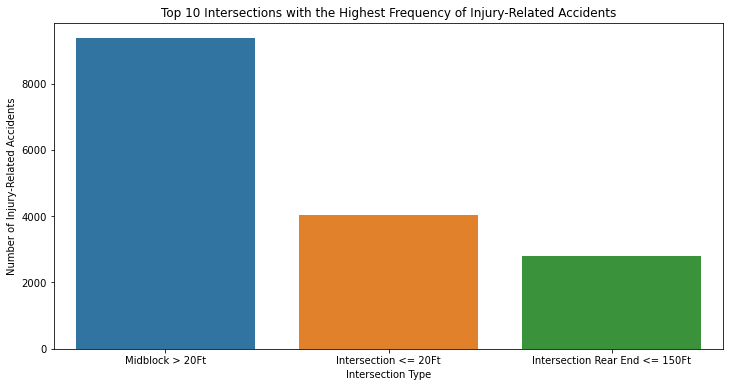

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x=intersection_counts.index, y=intersection_counts.values)
plt.title('Top 10 Intersections with the Highest Frequency of Injury-Related Accidents')
plt.xlabel('Intersection Type')
plt.ylabel('Number of Injury-Related Accidents')
plt.show()

In [18]:
print("\nRoad Types with the Highest Frequency of Injury-Related Accidents:")
print(injury_data['Road_Surface'].value_counts().head(10))


Road Types with the Highest Frequency of Injury-Related Accidents:
Dry             14514
Wet              1487
Not Stated        200
Slippery           13
Snowy Or Icy       10
Name: Road_Surface, dtype: int64


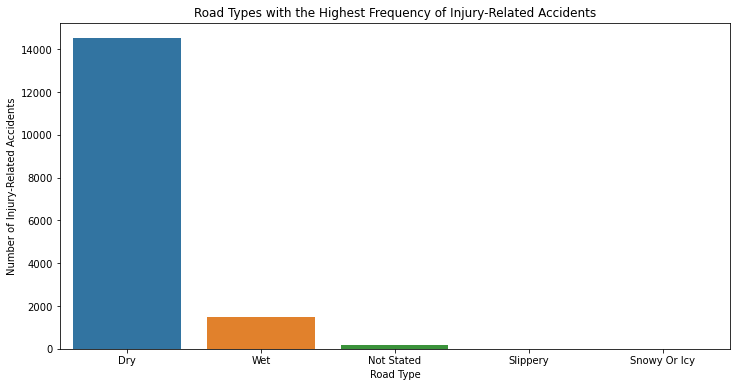

In [19]:
road_type_counts = injury_data['Road_Surface'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=road_type_counts.index, y=road_type_counts.values)
plt.title('Road Types with the Highest Frequency of Injury-Related Accidents')
plt.xlabel('Road Type')
plt.ylabel('Number of Injury-Related Accidents')
plt.show()